In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [2]:
class Image(object):
    
    def __init__(self,path):
        self.path = path
        self.bgr_image = None
        self.gray_image = None
        self.rgb_image = None
        
    def read_image(self,return_img = False):
        if not self.rgb_image:
            self.rgb_image = plt.imread(self.path)
            self.bgr_image = np.flip(self.rgb_image,axis=-1)
        
        if return_img:
            return self.bgr_image
    
    def rgb(self,return_img =False):
        if self.rgb_image is None:
            read_image(return_img=True)
        if return_img:
            return self.rgb_image
    
    def gray(self,return_img = False):
        self.gray_image = cv2.cvtColor(self.bgr_image, cv2.COLOR_BGR2GRAY)
        if return_img:
            return self.gray_image
    
    def Show(self,img,title='image'):
        plt.figure(figsize=[20,10])
        if len(img.shape)!=3 :
            plt.imshow(img,cmap='gray')
        else:
            plt.imshow(img)
        plt.title(title)
        plt.show()
        
    def Show_all(self,image_list,title_list):
        plt.figure(figsize=[20,10])
        assert len(image_list) == len(title_list), "Houston we've got a problem"
        N = len(image_list)
        for index,(img,title) in enumerate(zip(image_list,title_list)):
            plt.subplot(1,N,index+1)
            if len(img.shape)!=3 :
                plt.imshow(img,cmap='gray')
            else:
                plt.imshow(img)
            plt.title(title)
        plt.show()

## Test #1

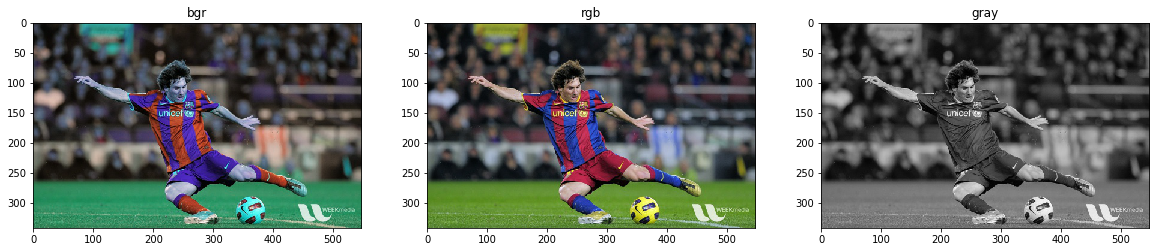

In [3]:
image = Image('./images/messi.jpg')
bgr = image.read_image(return_img=True)
rgb = image.rgb(return_img=True)
gray = image.gray(return_img=True)
image.Show_all([bgr,rgb,gray],['bgr','rgb','gray'])

#### Zero Padding
   Image padding. The padding is calculated so that the output image will have the same demensions as the 
   original image has (considering stride is always 1).
   - params:
       - image - a HxWxD image
       - k - the dimension of the kernel
   - return:
       - padded_image - an image the have been padded.

In [4]:
def zero_padding(image, k):
    p = int((k-1)/2)
    padded_image = np.zeros([2*p + image.shape[0], 2*p + image.shape[1], image.shape[2]])
    padded_image[p:-p, p:-p, :] = image
    
    return padded_image    

#### Min - Max scaling
   Min-max scaling will bring the range of pixles within an image to numbers between 0 to 1.
   - params:
       - image - a HxWxD image
   - return:
       - scaled image with pixel values between 0 to 1
   

In [5]:
def scale_minMax(image):
    return image/np.max(np.abs(image))

#### Convolve2d
   Convolution on a given image with a given kernel.
   - params:
       - image - Gray image or RGB image
       - kernel - The kernel to be used
   - return:
      - output -  New filtered(kerneled) image 
       

In [6]:
def convolve2d(image,kernel):
    k = kernel.shape[0] # Considering kernel is NxN (filter) matrix
    image = scale_minMax(image)
    
    if len(image.shape) != 3:
        image = image.reshape(image.shape[0],image.shape[1],1)
        
    padded_image = zero_padding(image, k) 
    output = np.zeros_like(image)
    
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            for dim in range(image.shape[2]):
                output[row,col,dim] = np.sum(kernel * padded_image[row: row+k, col: col+k,dim])
                
    if image.shape[2] == 1:
        return output.reshape(image.shape[0],image.shape[1])
    else:
        return output

## Test #2

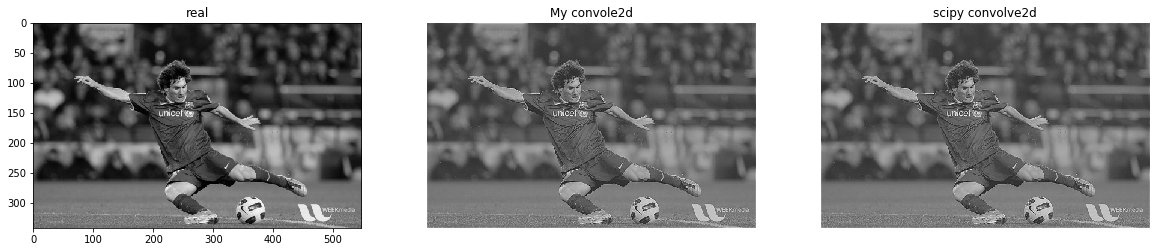

In [7]:
kernel = np.array([[0,-1,0],[-1,8,-1],[0,-1,0]])/4 # this kerenel is the definition of sharpen kernel
# kernel = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])/256 # guassian-blur(wikipedia :))
image_kernel = convolve2d(gray, kernel)
image_equalized = scale_minMax(gray)
plt.figure(figsize=[20,10])
plt.subplot(131)
plt.imshow(image_equalized,cmap=plt.cm.gray)
plt.title('real')
plt.subplot(132)
plt.imshow(image_kernel,cmap=plt.cm.gray)
plt.title('My convole2d')
plt.axis('off')
import scipy.signal
image_kernel = scipy.signal.convolve2d(image_equalized, kernel, 'same')
plt.subplot(133)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title('scipy convolve2d')
plt.axis('off')
plt.show()

# Test #3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


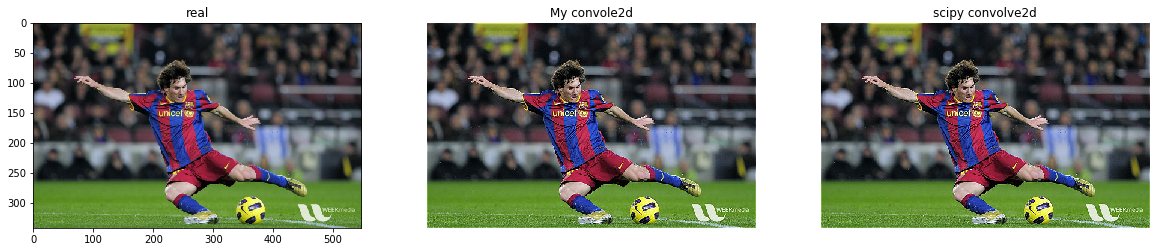

In [8]:
image_kernel = convolve2d(rgb, kernel)
image_equalized = scale_minMax(rgb)
plt.figure(figsize=[20,10])
plt.subplot(131)
plt.imshow(image_equalized )
plt.title('real')
plt.subplot(132)
plt.imshow(image_kernel)
plt.title('My convole2d')
plt.axis('off')
import scipy.signal
for dim in range(rgb.shape[2]):
    image_kernel[:,:,dim] = scipy.signal.convolve2d(image_equalized[:,:,dim], kernel, 'same')

plt.subplot(133)
plt.imshow(image_kernel)
plt.title('scipy convolve2d')
plt.axis('off')
plt.show()